In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
forest = pd.read_csv("cover_type.csv")
forest.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen
1,2590,56,2,212,-6,390,220,235,151,6225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen
2,2804,139,9,268,65,3180,234,238,135,6121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
3,2785,155,18,242,118,3090,238,238,122,6211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
4,2595,45,2,153,-1,391,220,234,150,6172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen


In [3]:
forest.shape

(145890, 55)

In [4]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145890 entries, 0 to 145889
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           145890 non-null  int64  
 1   Aspect                              145890 non-null  int64  
 2   Slope                               145890 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    145890 non-null  int64  
 4   Vertical_Distance_To_Hydrology      145890 non-null  int64  
 5   Horizontal_Distance_To_Roadways     145890 non-null  int64  
 6   Hillshade_9am                       145890 non-null  int64  
 7   Hillshade_Noon                      145890 non-null  int64  
 8   Hillshade_3pm                       145890 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  145890 non-null  int64  
 10  Wilderness_Area_1                   145890 non-null  float64
 11  Wilderness_Area_2         

In [5]:
forest.duplicated().sum()

np.int64(0)

In [6]:
forest.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,145890.0,2874.458949,210.801279,1863.0,2747.0,2909.0,3004.0,3849.0
Aspect,145890.0,141.127418,107.719296,0.0,54.0,108.0,217.0,360.0
Slope,145890.0,11.925574,6.319326,0.0,7.0,11.0,15.0,61.0
Horizontal_Distance_To_Hydrology,145890.0,251.824738,192.473899,0.0,95.0,212.0,362.0,1343.0
Vertical_Distance_To_Hydrology,145890.0,34.554322,41.215776,-146.0,7.0,23.0,51.0,554.0
Horizontal_Distance_To_Roadways,145890.0,3313.827541,1687.779953,0.0,1848.0,3420.0,4673.0,7117.0
Hillshade_9am,145890.0,217.368106,21.590298,0.0,207.0,222.0,232.0,254.0
Hillshade_Noon,145890.0,224.874748,16.084851,99.0,216.0,226.0,236.0,254.0
Hillshade_3pm,145890.0,139.788203,31.311690,0.0,121.0,140.0,159.0,248.0
Horizontal_Distance_To_Fire_Points,145890.0,3044.958105,1761.882341,0.0,1608.0,2713.0,4478.0,7173.0


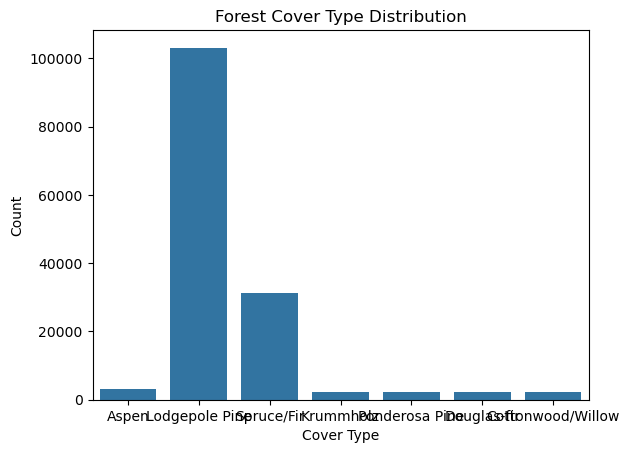

Cover_Type
Lodgepole Pine       103071
Spruce/Fir            31110
Aspen                  3069
Krummholz              2160
Ponderosa Pine         2160
Douglas-fir            2160
Cottonwood/Willow      2160
Name: count, dtype: int64


In [7]:
sns.countplot(x='Cover_Type', data=forest)
plt.title("Forest Cover Type Distribution")
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.show()

print(forest['Cover_Type'].value_counts())

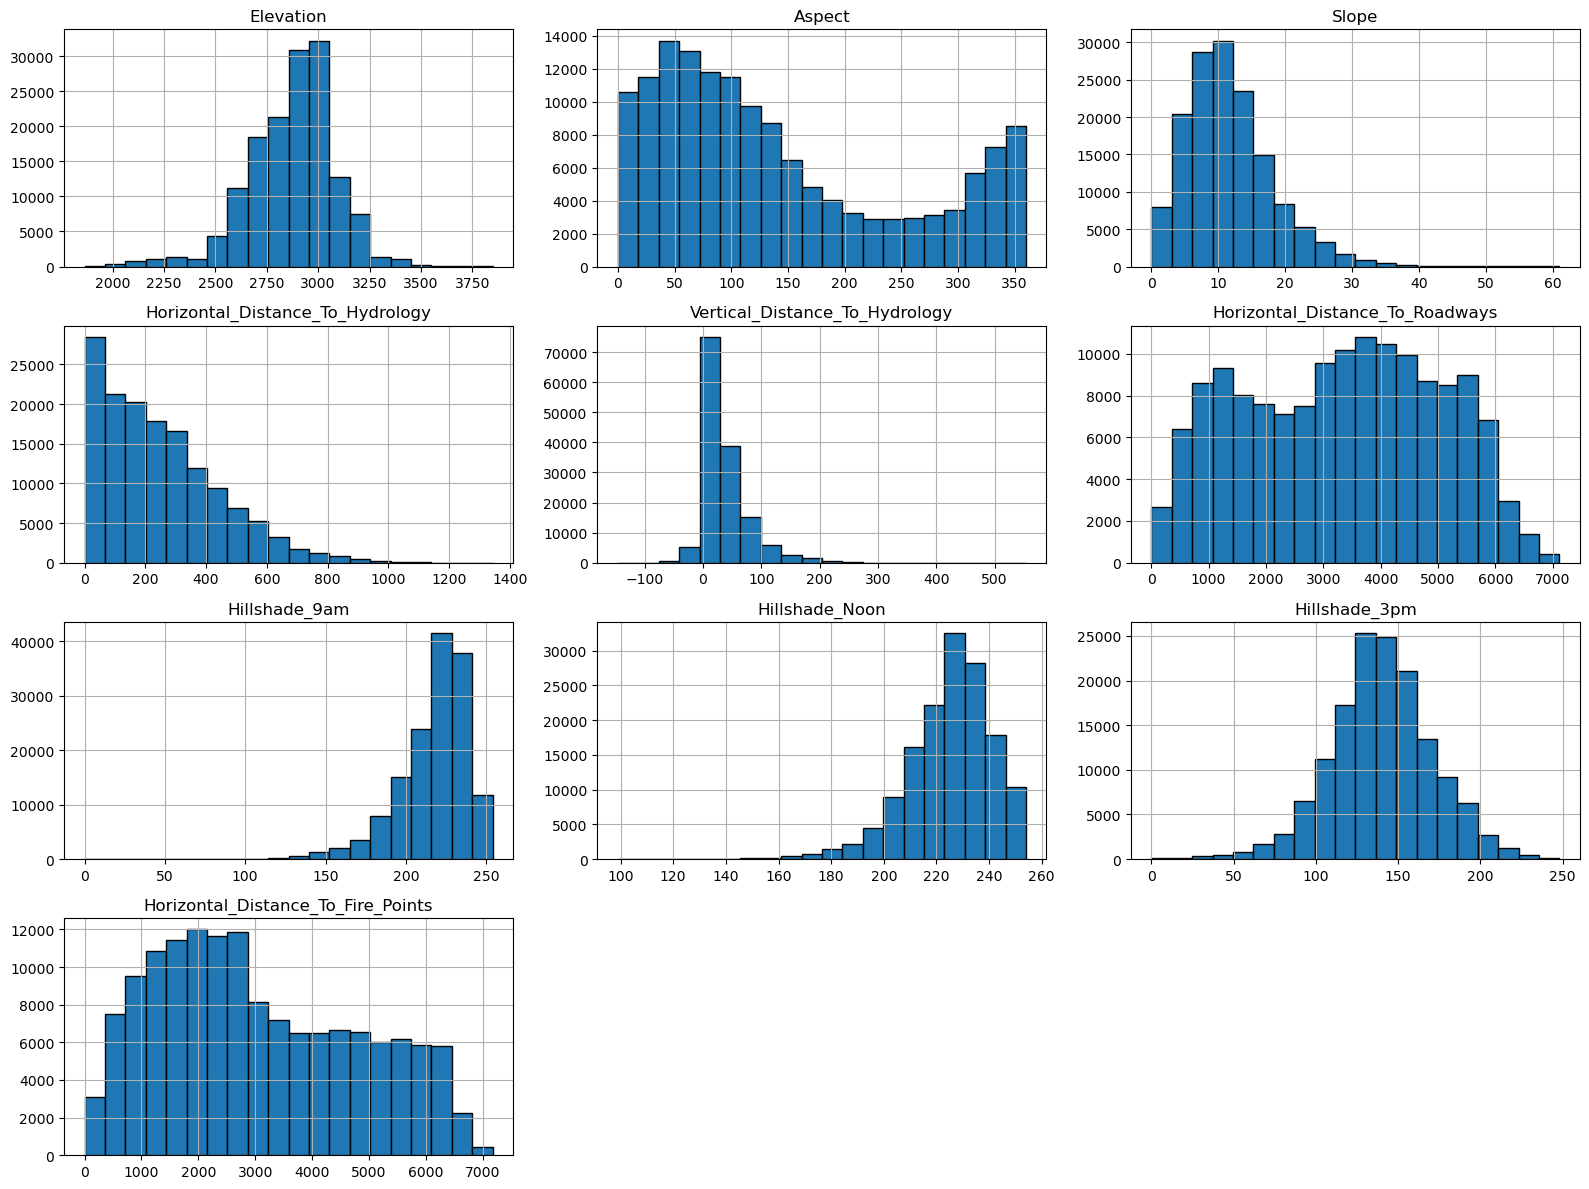

In [8]:
num_cols = ['Elevation', 'Aspect', 'Slope',
            'Horizontal_Distance_To_Hydrology',
            'Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways',
            'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
            'Horizontal_Distance_To_Fire_Points']

forest[num_cols].hist(figsize=(16,12), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()


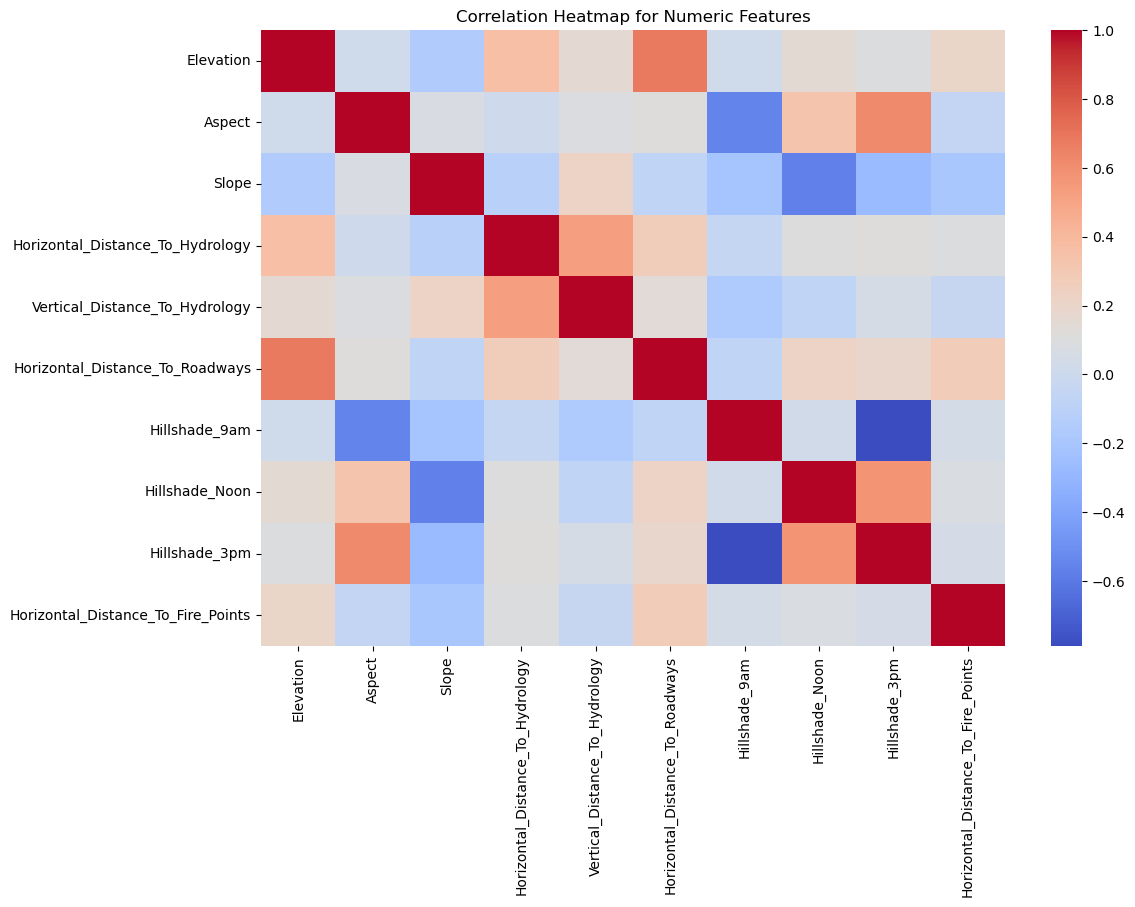

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(forest[num_cols].corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap for Numeric Features")
plt.show()


In [10]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report
import joblib


In [11]:
forest = forest.copy()   # avoid Setting Copy warnings
forest['Abs_Vertical_Distance_To_Hydrology'] = forest['Vertical_Distance_To_Hydrology'].abs()
forest['Hillshade_Range'] = forest['Hillshade_Noon'] - forest['Hillshade_3pm']
forest['Hillshade_Avg'] = forest[['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']].mean(axis=1)

In [12]:
X = forest.drop('Cover_Type', axis=1)
y = forest['Cover_Type']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=15, stratify=y)

In [14]:
print("Shapes -> X_train:", X_train.shape, "X_test:", X_test.shape)
print("\nTrain class distribution BEFORE SMOTE:\n", y_train.value_counts())

Shapes -> X_train: (116712, 57) X_test: (29178, 57)

Train class distribution BEFORE SMOTE:
 Cover_Type
Lodgepole Pine       82457
Spruce/Fir           24888
Aspen                 2455
Ponderosa Pine        1728
Douglas-fir           1728
Cottonwood/Willow     1728
Krummholz             1728
Name: count, dtype: int64


In [15]:
sm = SMOTE(random_state=15)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

print("\nTrain class distribution AFTER SMOTE:\n", y_train_bal.value_counts())


Train class distribution AFTER SMOTE:
 Cover_Type
Lodgepole Pine       82457
Spruce/Fir           82457
Ponderosa Pine       82457
Aspen                82457
Douglas-fir          82457
Cottonwood/Willow    82457
Krummholz            82457
Name: count, dtype: int64


In [16]:
X_train_bal = pd.DataFrame(X_train_bal, columns=X_train.columns)
X_test = pd.DataFrame(X_test, columns=X_train.columns)

In [17]:
le = LabelEncoder()
y_train_bal_enc = le.fit_transform(y_train_bal)

In [18]:
models = {
    "Logistic Regression": Pipeline([('scaler', StandardScaler()),
                                     ('clf', LogisticRegression(solver='saga', max_iter=5000, random_state=15))]),
    "Decision Tree": DecisionTreeClassifier(random_state=15),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=15),
    "KNN": KNeighborsClassifier()
}

In [19]:
results = []
for name, model in models.items():
    print(f"Training: {name} ...")
    if name == "Logistic Regression":
        model.fit(X_train_bal, y_train_bal)      # pipeline scales internally
        preds = model.predict(X_test)
    else:
        model.fit(X_train_bal.values, y_train_bal)
        preds = model.predict(X_test.values)

    acc = accuracy_score(y_test, preds)
    macro_f1 = f1_score(y_test, preds, average='macro')  
    results.append((name, model, acc, macro_f1))
    print(f"{name}: Accuracy={acc:.4f}, Macro F1={macro_f1:.4f}")

Training: Logistic Regression ...
Logistic Regression: Accuracy=0.8050, Macro F1=0.6781
Training: Decision Tree ...
Decision Tree: Accuracy=0.9412, Macro F1=0.8783
Training: Random Forest ...
Random Forest: Accuracy=0.9485, Macro F1=0.9072
Training: KNN ...
KNN: Accuracy=0.9527, Macro F1=0.9001


In [20]:
print("Training: XGBoost ...")
xgb = XGBClassifier(eval_metric='mlogloss', random_state=15)
xgb.fit(X_train_bal.values, y_train_bal_enc)
preds_enc = xgb.predict(X_test.values)                    # numeric preds
preds_xgb = le.inverse_transform(preds_enc.astype(int))   # to original labels
acc = accuracy_score(y_test, preds_xgb)
macro_f1 = f1_score(y_test, preds_xgb, average='macro')
results.append(("XGBoost", xgb, acc, macro_f1))
print(f"XGBoost: Accuracy={acc:.4f}, Macro F1={macro_f1:.4f}")

Training: XGBoost ...
XGBoost: Accuracy=0.9197, Macro F1=0.8924


In [23]:
results_sorted = sorted(results, key=lambda x: x[3], reverse=True)
print("\n--- Model comparison (best first by Macro F1) ---")
for name, model, acc, macro_f1 in results_sorted:
    print(f"{name:18s} | Accuracy: {acc:.4f} | Macro F1: {macro_f1:.4f}")


--- Model comparison (best first by Macro F1) ---
Random Forest      | Accuracy: 0.9485 | Macro F1: 0.9072
KNN                | Accuracy: 0.9527 | Macro F1: 0.9001
XGBoost            | Accuracy: 0.9197 | Macro F1: 0.8924
Decision Tree      | Accuracy: 0.9412 | Macro F1: 0.8783
Logistic Regression | Accuracy: 0.8050 | Macro F1: 0.6781


In [24]:
best_name, best_model, best_acc, best_macro = results_sorted[0]
print(f"\nBest model chosen: {best_name} (Accuracy={best_acc:.4f}, Macro F1={best_macro:.4f})")


Best model chosen: Random Forest (Accuracy=0.9485, Macro F1=0.9072)


In [25]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [27]:
y_pred = best_model.predict(X_test.values)


In [28]:
print("Classification Report for Random Forest:\n")
print(classification_report(y_test, y_pred, digits=4))

Classification Report for Random Forest:

                   precision    recall  f1-score   support

            Aspen     0.8718    0.8974    0.8844       614
Cottonwood/Willow     0.9353    0.9699    0.9523       432
      Douglas-fir     0.8528    0.8449    0.8488       432
        Krummholz     0.9356    0.9745    0.9546       432
   Lodgepole Pine     0.9699    0.9673    0.9686     20614
   Ponderosa Pine     0.8208    0.8588    0.8394       432
       Spruce/Fir     0.9029    0.9013    0.9021      6222

         accuracy                         0.9485     29178
        macro avg     0.8984    0.9163    0.9072     29178
     weighted avg     0.9486    0.9485    0.9485     29178



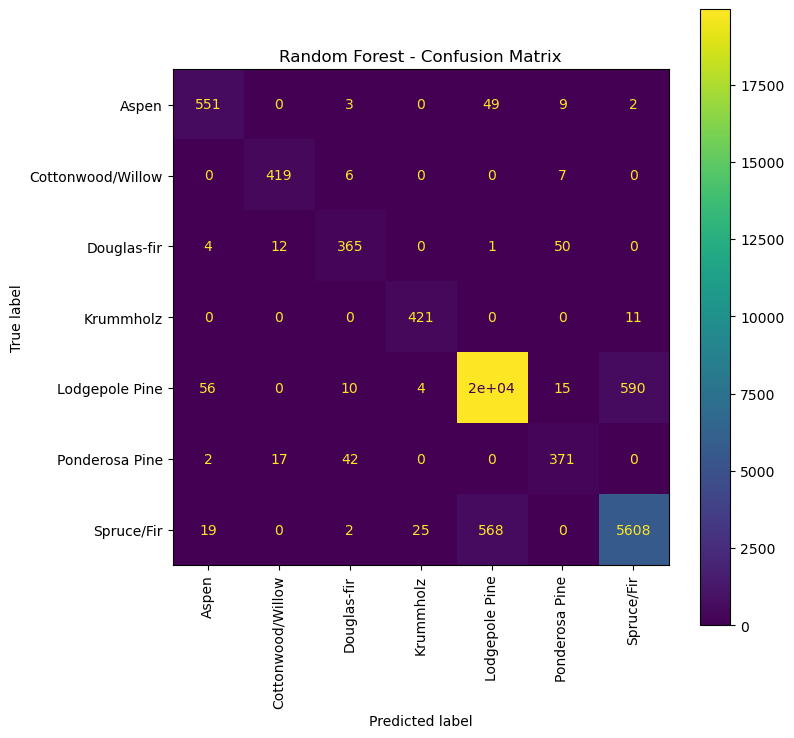

In [29]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=best_model.classes_)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax, xticks_rotation='vertical')
plt.title("Random Forest - Confusion Matrix")
plt.show()

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [31]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=15)

rand_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=6,            
    scoring='f1_macro',
    cv=3,
    random_state=15,
    n_jobs=-1,
    verbose=1
)

# Fit on your training data
rand_search.fit(X_train_bal, y_train_bal)

# Best model after tuning
tuned_rf = rand_search.best_estimator_
print("Best hyperparameters:", rand_search.best_params_)
print("Best CV F1-macro score:", rand_search.best_score_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
Best CV F1-macro score: 0.9788254530708093


In [34]:
y_tuned_pred = tuned_rf.predict(X_test)
print("Tuned Model Test Accuracy:", accuracy_score(y_test, y_tuned_pred))
print("Tuned Model Test Macro F1:", f1_score(y_test, y_tuned_pred, average='macro'))

Tuned Model Test Accuracy: 0.9189800534649394
Tuned Model Test Macro F1: 0.8863822347985169


In [35]:
print("\nClassification Report for tuned Random Forest:\n")
print(classification_report(y_test, y_tuned_pred, target_names=le.classes_, digits=4))


Classification Report for tuned Random Forest:

                   precision    recall  f1-score   support

            Aspen     0.7957    0.9137    0.8506       614
Cottonwood/Willow     0.9374    0.9699    0.9534       432
      Douglas-fir     0.8250    0.8403    0.8326       432
        Krummholz     0.9136    0.9792    0.9453       432
   Lodgepole Pine     0.9668    0.9290    0.9475     20614
   Ponderosa Pine     0.8133    0.8472    0.8299       432
       Spruce/Fir     0.8058    0.8891    0.8454      6222

         accuracy                         0.9190     29178
        macro avg     0.8654    0.9098    0.8864     29178
     weighted avg     0.9233    0.9190    0.9203     29178



In [38]:
import joblib
joblib.dump(tuned_rf, "forest_cover_tuned_rf.pkl")
print("Saved: forest_cover_tuned_rf.pkl")


Saved: forest_cover_tuned_rf.pkl
